# Exploratory Data Anlysis 

This notebook contains the Exploratory Data Anlysis (EDA) of house price dataset available on [kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Before we build our model our first task is to analyse the datasets, in order to get better understanding of data.

### 1. Dataset Loading and Import of Required Libries

In [1]:
# to handle the data
import pandas as pd
import numpy as np

# for plotting graphs
import matplotlib.pyplot as plt

# to display all the columns of the dataframe in the notebook without truncatin
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('house_pricing.csv')

# rows & columns of data
print(data.shape)

# Visualise the first 5 rows the dataframe
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Thsi dataset contains 1460 rows and 81 columns or 81 variables.

**The objective of the data analyse is to identify:**

1. Missing Values
2. Numerical Variables
3. Distribution of the numberical variables
4. Outliers
5. Categorical variables
6. Cardinality of th categorical variables
7. Potential relationship between variables and the targe

### 2. Missing Values

In [9]:
# make a list of the variables that contain atleast one missing value
vars_with_na = [var for var in data.columns if data[var].isnull().sum() >1]

# get the variable name and corresponding percentage of missing values
for var in vars_with_na:
    print(var, round(data[var].isnull().mean() *100, 3), '% of values missing')

LotFrontage 17.74 % of values missing
Alley 93.767 % of values missing
MasVnrType 0.548 % of values missing
MasVnrArea 0.548 % of values missing
BsmtQual 2.534 % of values missing
BsmtCond 2.534 % of values missing
BsmtExposure 2.603 % of values missing
BsmtFinType1 2.534 % of values missing
BsmtFinType2 2.603 % of values missing
FireplaceQu 47.26 % of values missing
GarageType 5.548 % of values missing
GarageYrBlt 5.548 % of values missing
GarageFinish 5.548 % of values missing
GarageQual 5.548 % of values missing
GarageCond 5.548 % of values missing
PoolQC 99.521 % of values missing
Fence 80.753 % of values missing
MiscFeature 96.301 % of values missing


There are 18 variables with missing values in the dataset.

**Relationship between missing values and the target(Sale Price)**

Let's evaluate price of the house for those variables with missing data.

In [86]:
def analyse_na_values(df, na_vars):
    """
    df-> dataframe
    na_vars -> variables with missing values(list of strings)
    """
    df = df.copy()
    
    # Let's replace varialbe missing data with 1 and else 0
    for var in na_vars:
        df[var] = np.where(df[var].isnull(), 1, 0)
        
        # Let's plot the mean SaelPrice group by vriable missing and present
        c = ['blue', '#FD7F20']
        plt.style.use('ggplot')
        df.groupby(var)['SalePrice'].median().plot.bar(color=c)
        plt.title(var)
        plt.show()
        

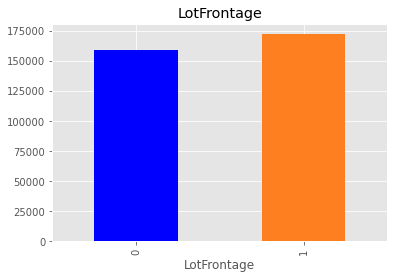

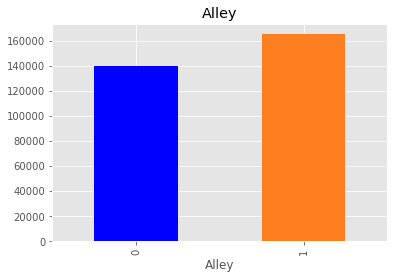

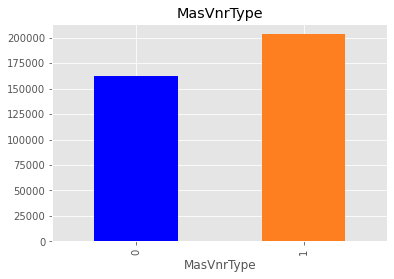

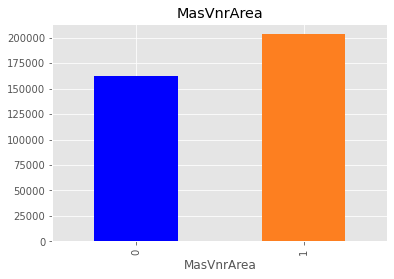

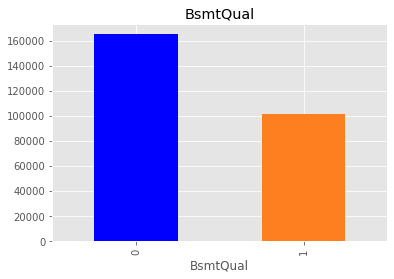

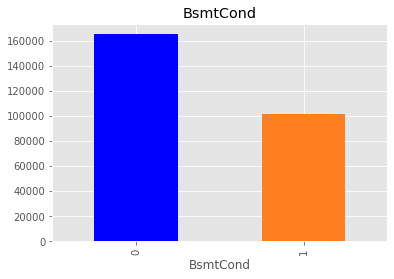

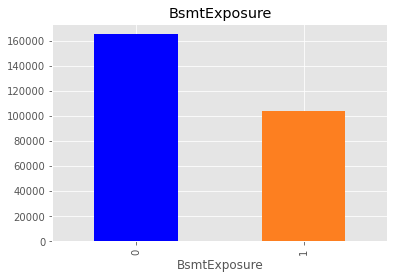

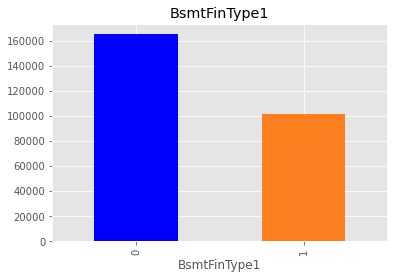

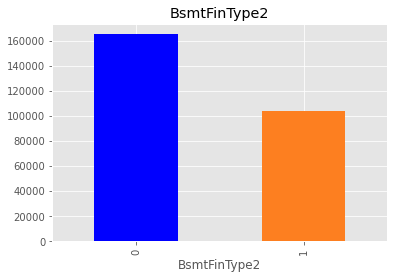

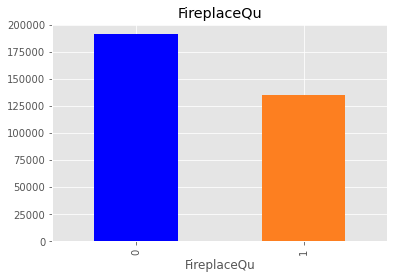

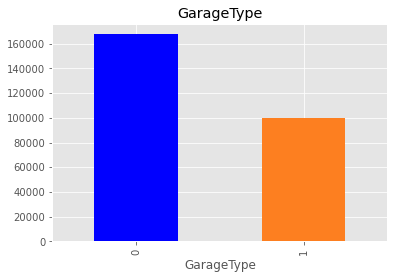

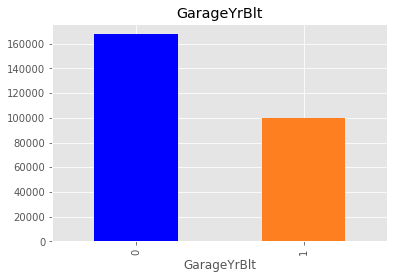

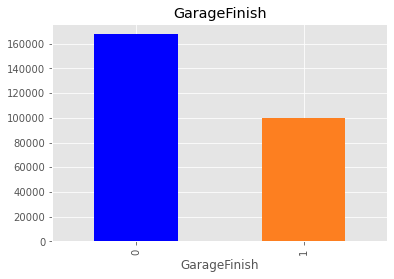

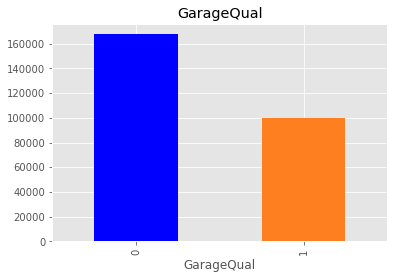

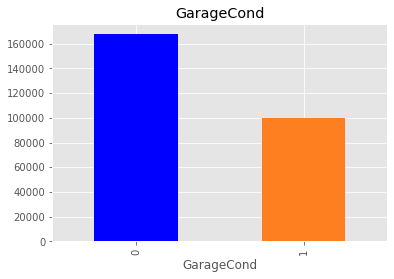

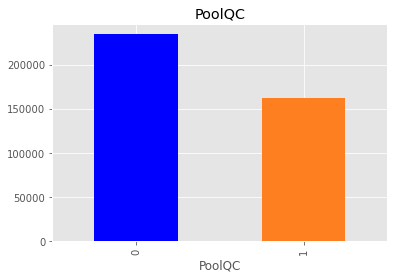

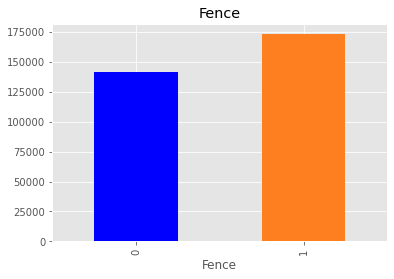

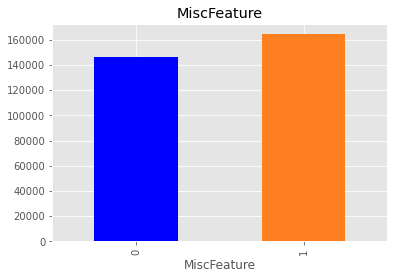

In [87]:
analyse_na_values(data, vars_with_na)

After analysing bar graphs, it can be oberved that missing information of variable is important. Later we will feature engineer these missing variables.

### 3. Numerical Variables

In this section let's focus on numerical variables

In [34]:
# make a list of the variables that contain numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# Visualise the first 5 rows the dataframe with numerical variables
data[num_vars].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [36]:
print('Number of unique Id labels: ', len(data.Id.unique()))
print('Number of rows in the data set: ', len(data))

Number of unique Id labels:  1460
Number of rows in the data set:  1460


Since every row in 'Id' column contains unique values we can remove that variable from modeling.

### 4. Temporal Variables
We can observe that there are 4 vairables that contains year data. Instead of taking the value as it is , we can extract information. For example, the difference in yeras between the year the house was built and year the house was sold. 

In [37]:
# make a list of the variables that contain year info
year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [39]:
# let's explore the content in year varibles
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Let's explore the sale price with years which the houe was sold:

Text(0.5, 1.0, 'Change in House Price with the Years')

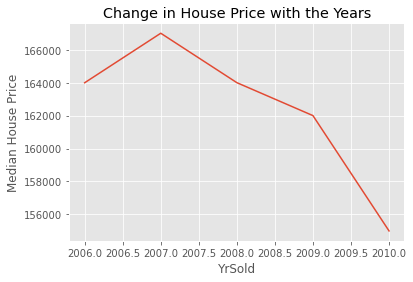

In [85]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.style.use('ggplot')
plt.ylabel('Median House Price')
plt.title('Change in House Price with the Years')

Though in real life house price increase with years, we can see price going down here.

Let's plot the year variable difference with sold year and house price.

In [83]:
def analyse_year_vars(df, year_vars):
    """
    df-> dataframe
    na_vars -> variables with missing values(list of strings)
    """
    df = df.copy()
     # calculate the difference between year variable thw year of the house sold
    
    for var in year_vars:
        if var != 'YrSold':
            df[var] = df['YrSold'] -df[var]
            plt.style.use('ggplot')
            plt.figure(figsize=[10,5])
            plt.scatter(df[var], df['SalePrice'])
            plt.ylabel('SalePrice')
            plt.xlabel(var)
            plt.show()

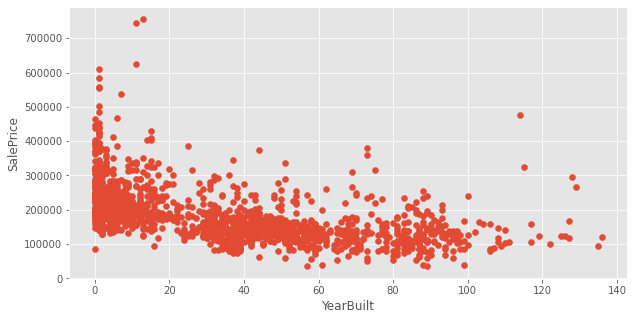

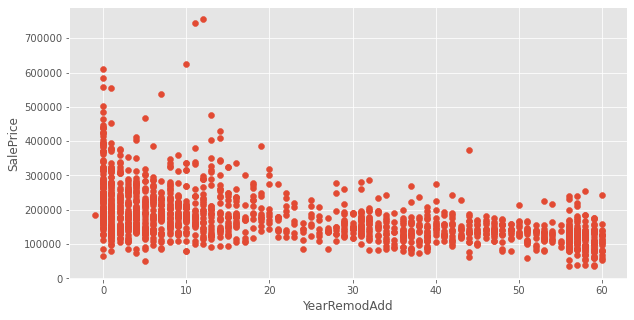

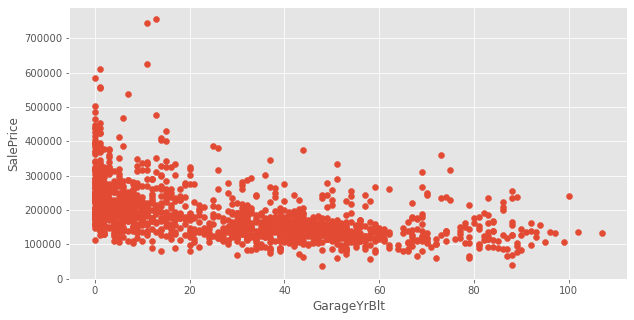

In [84]:
analyse_year_vars(data, year_vars)

We can see with older the feature get, price decrease.

### 5. Discrete Variables

Let's find out the variabels with discrete values

In [62]:
# make a list of discrete variables (less than 20 unique values), excluding year variables and Id
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars+["Id"]]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  14


In [64]:
# Visualise the first 5 rows the dataframe with discrete variables
data[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


Let's visualise the discrete variables and SalePrice

In [157]:
def analyse_discrete(df, dis_var):
    """
    df-> dataframe
    dis_var -> variables with continous values(list of strings)
    """
    df = df.copy()
    for var in dis_var:
        plt.style.use('ggplot')
        c=['blue', 'green', 'red', 'yellow', 'cyan', 'purple', 'orange', 'grey', 'pink']
        df.groupby(var)['SalePrice'].median().plot.bar(color=c)
        plt.title(var)
        plt.ylabel("Sale Price")
        plt.show()

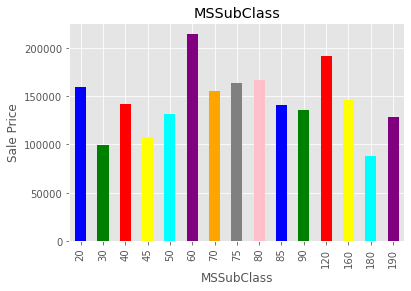

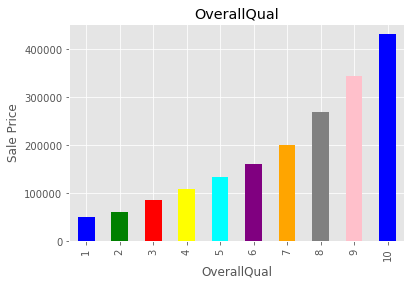

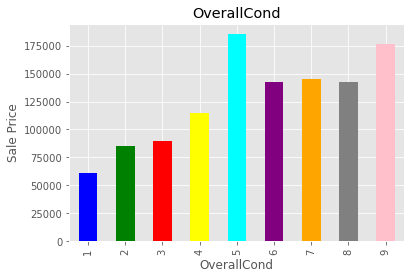

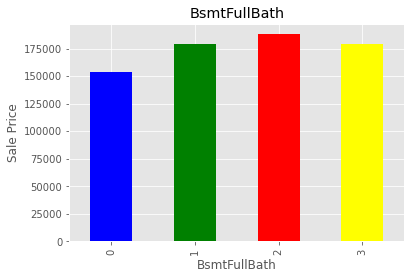

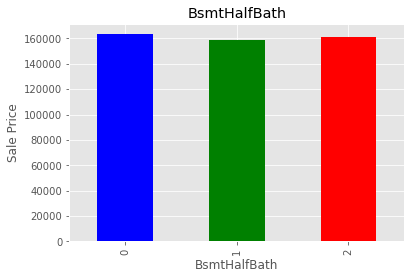

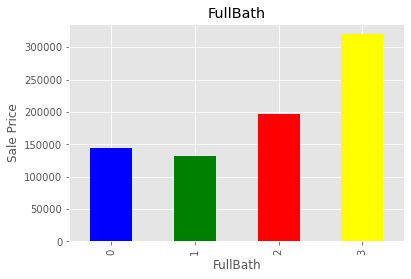

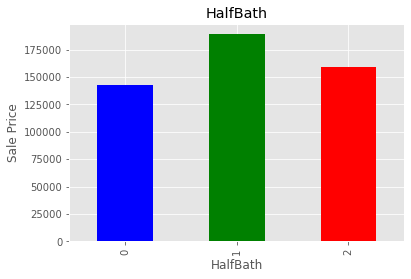

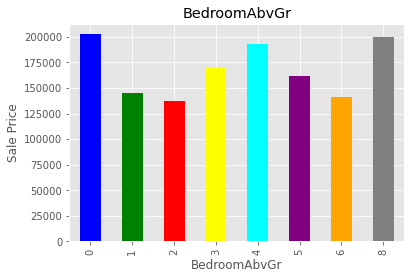

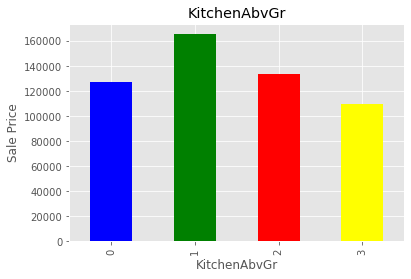

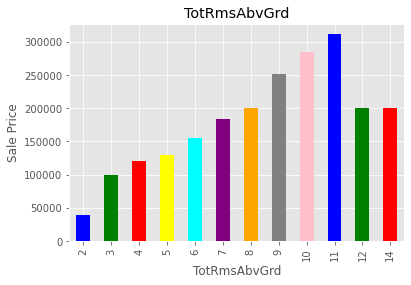

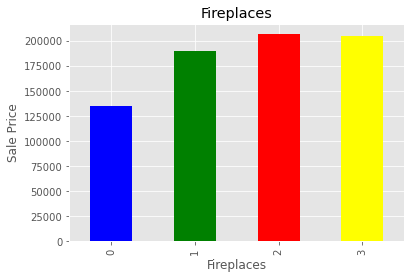

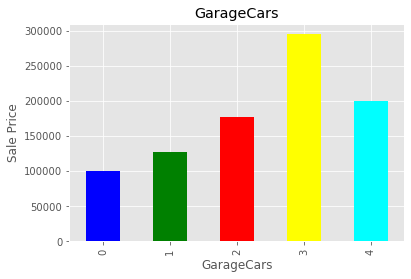

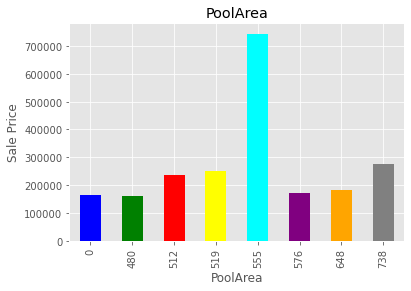

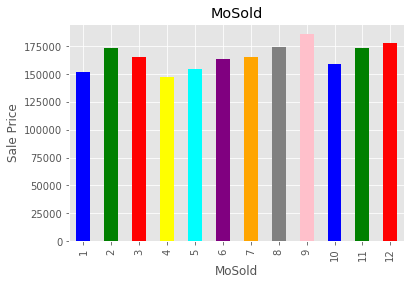

In [158]:
analyse_discrete(data, discrete_vars)

We can see that there is a relationship between variable number and SalePrice, but it is not a monotonic.

When consider about "OverallQual", "FullBath" and "FirePlaces" variables there is monotonic relationship. Higer the number, higher the price.

### 6. Continous Variables

Now let's analyse the continous variables in the dataset. For that we take the all the variables that are not temporal or discrete.

In [89]:
# make a list of  continous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print('Number of continous variables: ', len(cont_vars))

Number of continous variables:  19


In [90]:
# Visualise the first 5 rows the dataframe with continous variables
data[cont_vars].head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


In [91]:
# Let's analyse the distribution of these varibels

def analyse_contvars(df, cont_var):
    """
    df-> dataframe
    cont_var -> variables with missing values(list of strings)
    """
    df = df.copy()
    for var in cont_var:
        plt.style.use('ggplot')
        df[var].hist(bins=20)
        plt.title(var)
        plt.ylabel("Number of Houses")
        plt.show()

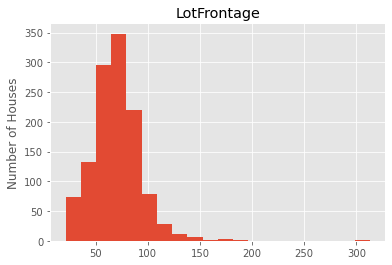

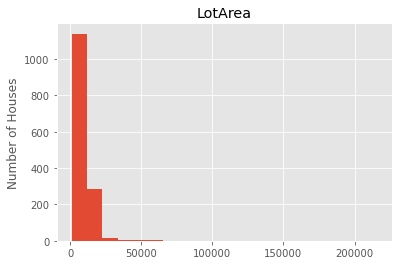

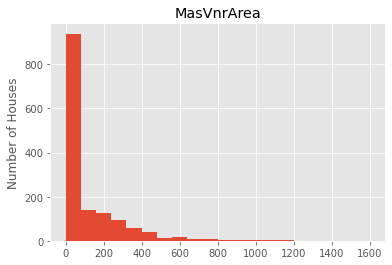

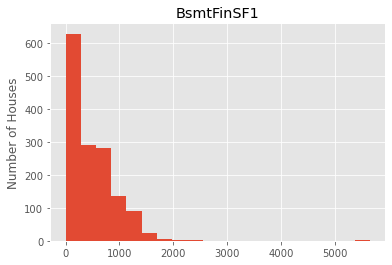

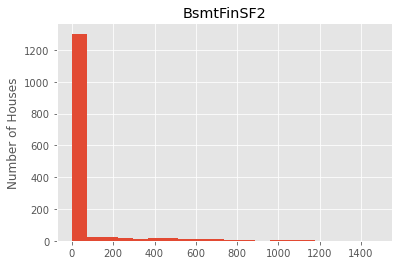

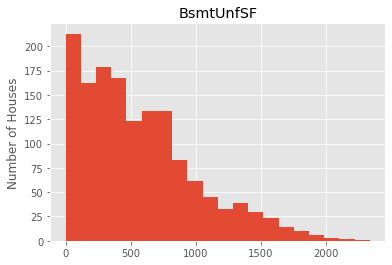

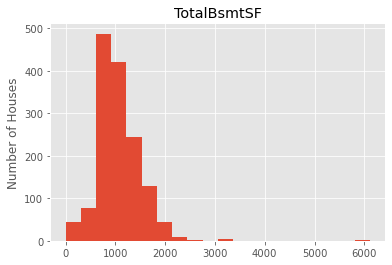

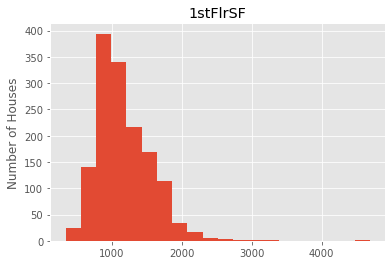

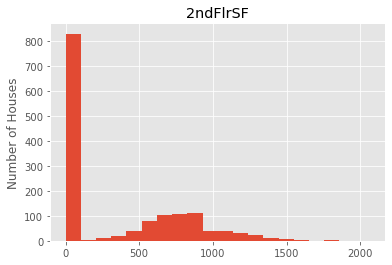

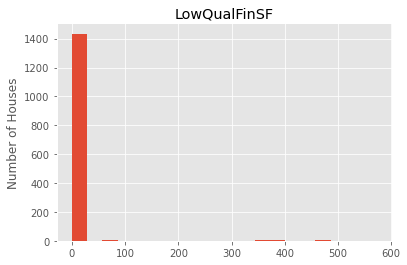

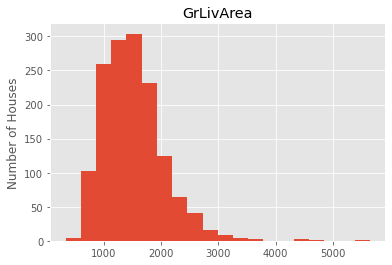

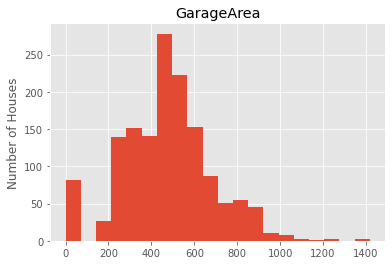

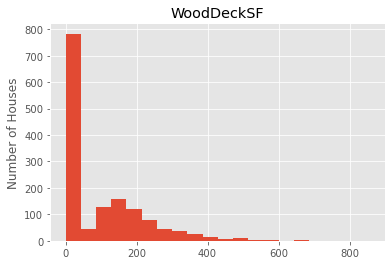

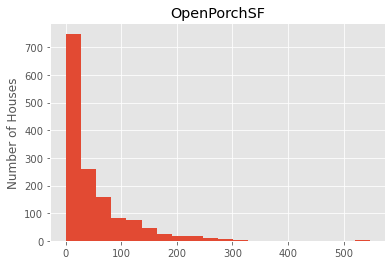

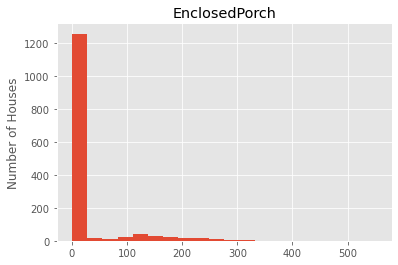

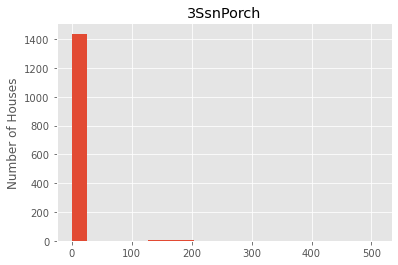

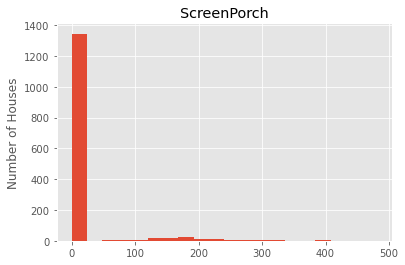

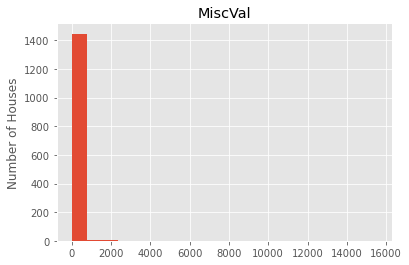

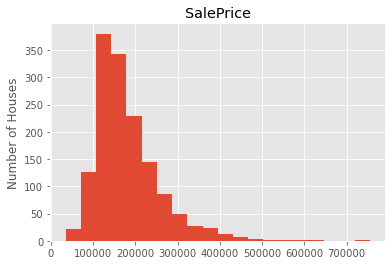

In [92]:
analyse_contvars(data, cont_vars)

We can see the all of the cotinous variables are not normaly distributed, including target variable "SalePrice". For linear regression model prefer normal distribution, later in feature engineering notebook will transform these variables.

For now let's use log transformations to plot variable with Gaussian looking.

In [130]:
def analyse_contvars(df, cont_var):
    """
    df-> dataframe
    cont_var -> variables with continous values(list of strings)
    """
    
    df = df.copy()
    for var in cont_var:
        # we have to remove the 0 values, since log undifine for less than or equal to 0
        if 0 in df[var].unique():
            pass
        else:
            df[var] = np.log(df[var])
            df[var].hist(bins=20)
            plt.style.use('ggplot')
            plt.title(var)
            plt.ylabel("Number of Houses")
            plt.show()

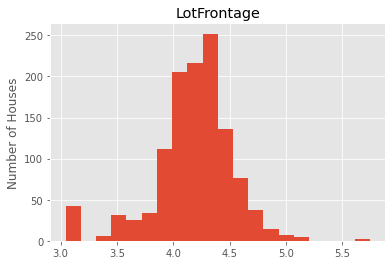

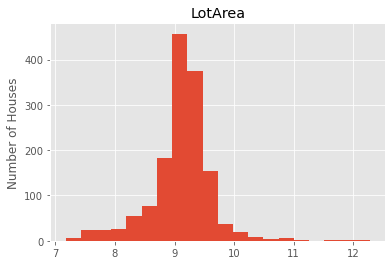

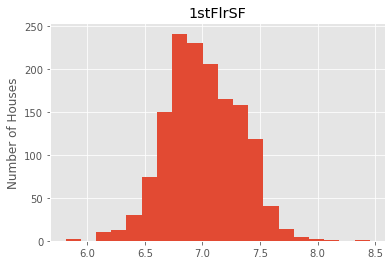

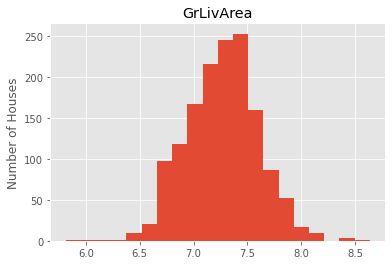

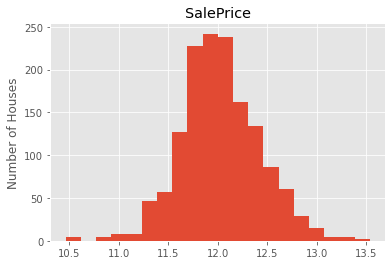

In [131]:
analyse_contvars(data, cont_vars)

Log transformation gives much better normal distribution for the variales.

In [132]:
# let's explore relationship between house price and transformed variables
def analyse_transform_cont(df, cont_var):
    """
    df-> dataframe
    cont_var -> variables with continous values(list of strings)
    """
    df = df.copy()
    for var in cont_var:
        # we have to remove the 0 values, since log undifine for less than or equal to 0
        if var == 'SalePrice' or 0 in df[var].unique():
            pass
        else:
            df[var] = np.log(df[var])
            df['SalePrice'] = np.log(df['SalePrice'])
            plt.figure(figsize=[10,5])
            plt.scatter(df[var], df['SalePrice'])            
            plt.style.use('ggplot')
            plt.xlabel(var)
            plt.ylabel("Sale Price")
            plt.show()

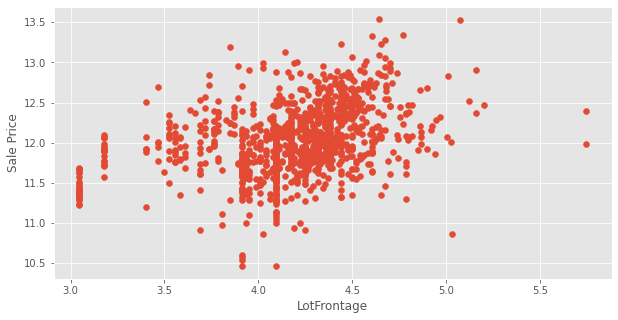

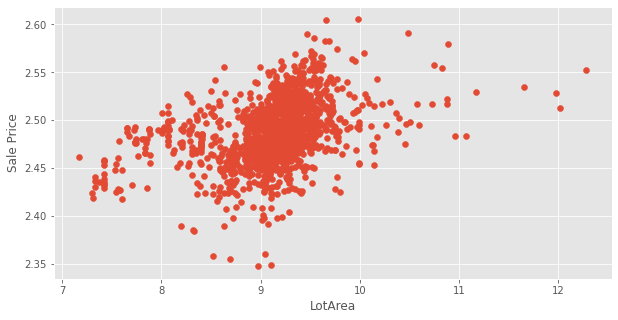

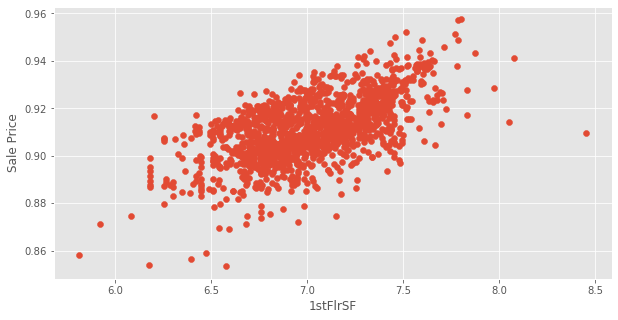

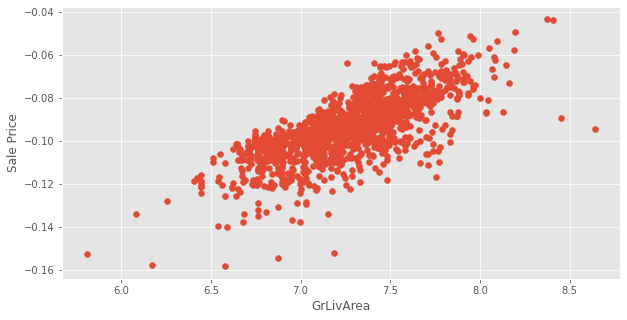

In [133]:
analyse_transform_cont(data, cont_vars)

We can observe that there is a monotonic relationship between 'SalePrice' and log transformed variables.

### 7. Outliers

We can analyse the outlier in the data using boxplot.

In [140]:
def find_ouliers(df, cont_var):
    
    """
    df-> dataframe
    cont_var -> variables with continous values(list of strings)
    """
    df = df.copy() 
    for var in cont_var:
        # we have to remove the 0 values, since log undifine for less than or equal to 0
        if 0 in df[var].unique():
            pass
        else:
            df[var] = np.log(df[var])
            df.boxplot(column=var)
            plt.title(var)
            plt.ylabel(var)
            plt.show()

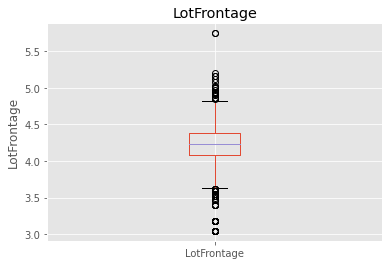

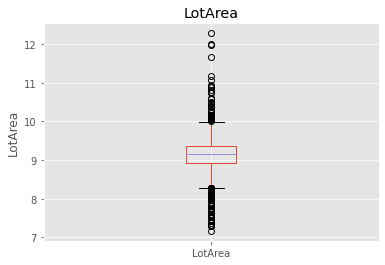

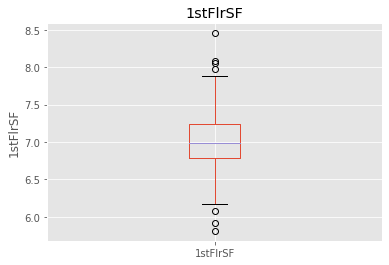

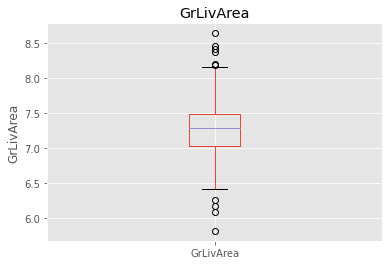

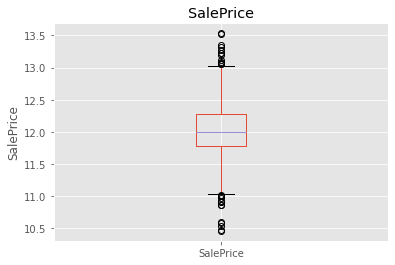

In [141]:
find_ouliers(data, cont_vars)

We can see large number of values in continous variables seems contains outliers. Outlier can cause performance issues in the linear model.


### 8. Categorical Variables

Let's analyse the categorical varibles

In [155]:
# make a list of  categorical variables
cat_vars = [var for var in data.columns if data[var].dtypes =='O']

print("Number of categorical variables: ", len(cat_vars))



Number of categorical variables:  43


In [143]:
# Visualise the first 5 rows the dataframe with categorical variables
data[cat_vars].head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


***Number of Labels***

Let's analyse the how many differenct categories are present in each of the variables.

In [145]:
for var in cat_vars:
    print(var, len(data[var].unique()), 'categories')

MSZoning 5 categories
Street 2 categories
Alley 3 categories
LotShape 4 categories
LandContour 4 categories
Utilities 2 categories
LotConfig 5 categories
LandSlope 3 categories
Neighborhood 25 categories
Condition1 9 categories
Condition2 8 categories
BldgType 5 categories
HouseStyle 8 categories
RoofStyle 6 categories
RoofMatl 8 categories
Exterior1st 15 categories
Exterior2nd 16 categories
MasVnrType 5 categories
ExterQual 4 categories
ExterCond 5 categories
Foundation 6 categories
BsmtQual 5 categories
BsmtCond 5 categories
BsmtExposure 5 categories
BsmtFinType1 7 categories
BsmtFinType2 7 categories
Heating 6 categories
HeatingQC 5 categories
CentralAir 2 categories
Electrical 6 categories
KitchenQual 4 categories
Functional 7 categories
FireplaceQu 6 categories
GarageType 7 categories
GarageFinish 4 categories
GarageQual 6 categories
GarageCond 6 categories
PavedDrive 3 categories
PoolQC 4 categories
Fence 5 categories
MiscFeature 5 categories
SaleType 9 categories
SaleCondition 6

All the categorical variables contains low number of unique labels. 

***Rare Label***

Let's investigate labels that are present only in small number of houses:

In [152]:
def analyse_rare_label(df, cat_var, rare_perc):
    """
    df-> dataframe
    cat_var -> variables with categorical values(list of strings)
    rare_perc -> threshold limit for rare label(float)
    """
    
    df = df.copy()
    for var in cat_var:
        tmp = df.groupby(var)['SalePrice'].count() / len(df)
        print(tmp[tmp < rare_perc])
        print()
   
    

In [153]:
analyse_rare_label(data, cat_vars, 0.01)


MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

We can see that there some categorical varibles with multiple labels that are present less than 1%. In the feature engineering step we have to look into that matter.

Finally, let's explore the realationship between the categories of difference variable and house price.

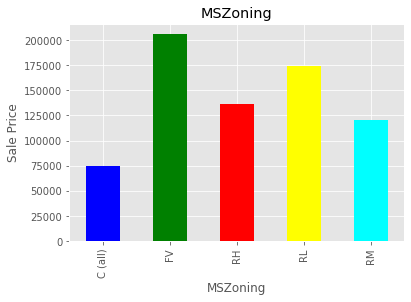

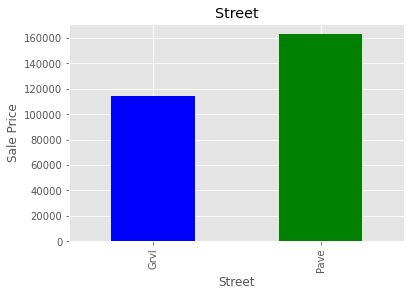

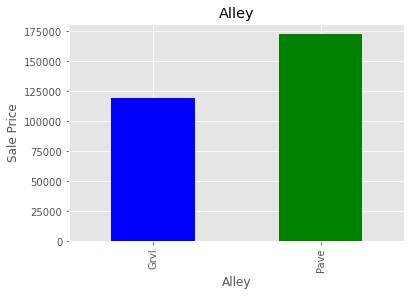

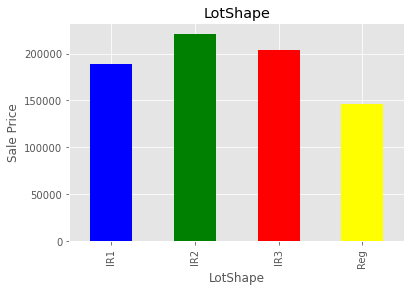

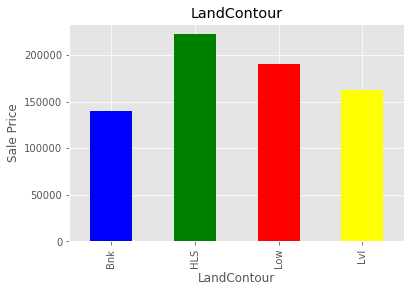

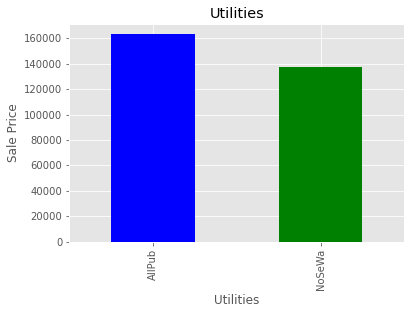

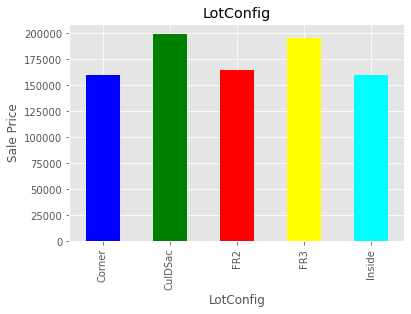

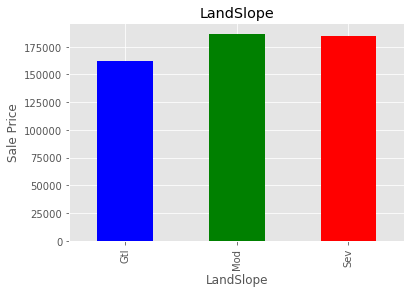

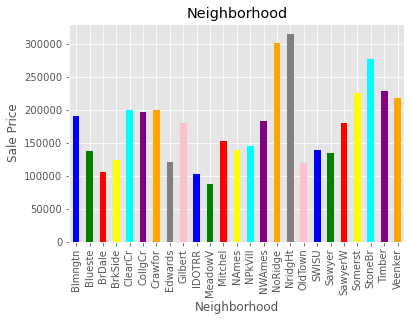

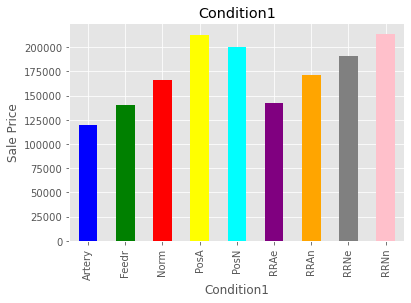

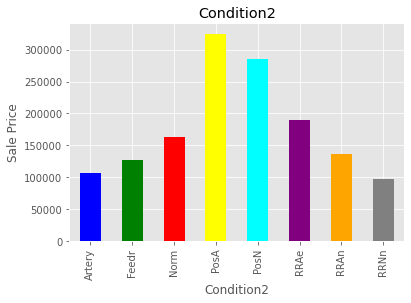

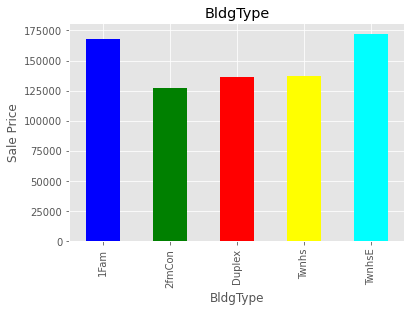

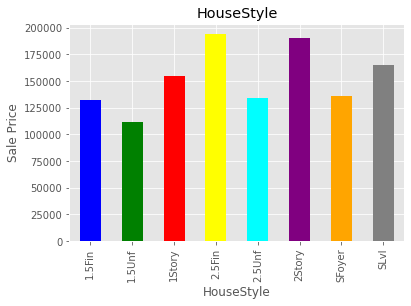

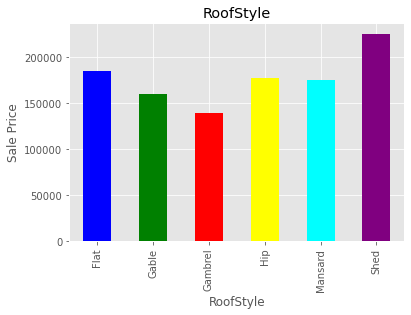

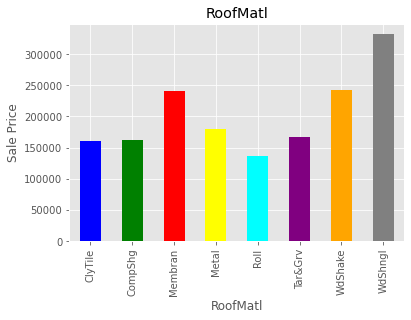

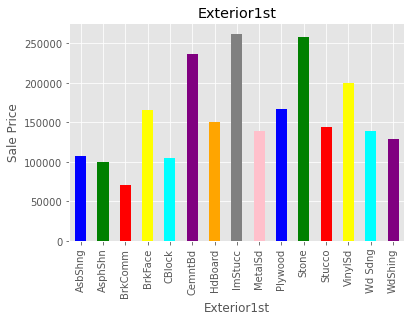

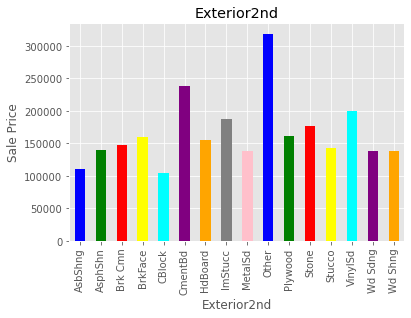

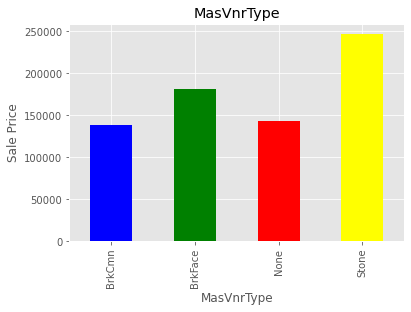

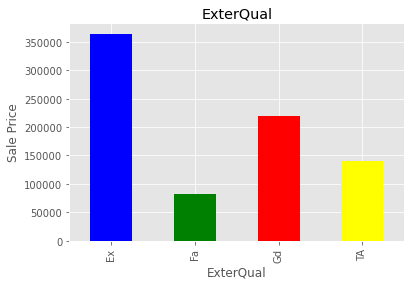

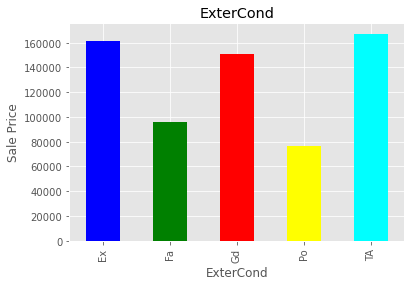

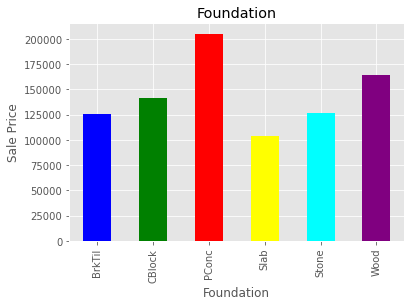

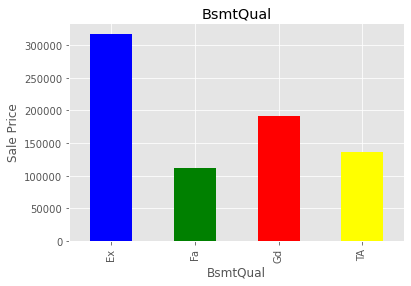

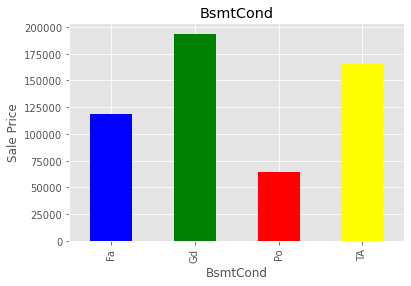

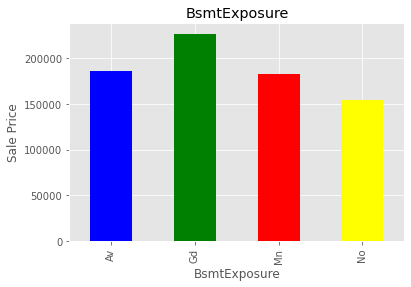

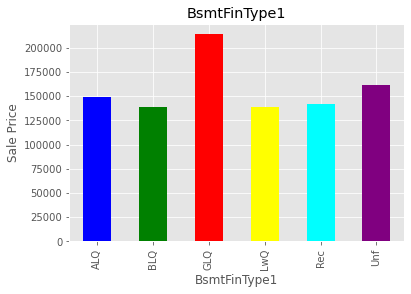

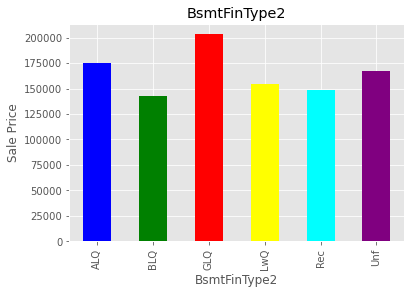

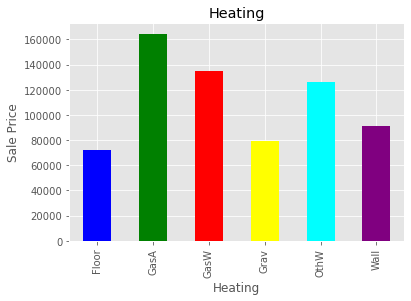

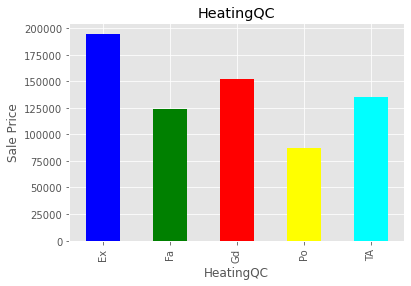

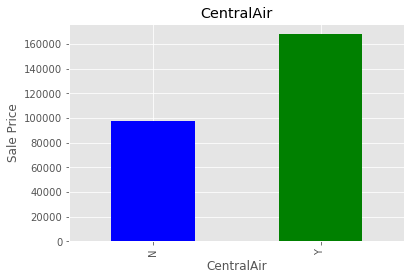

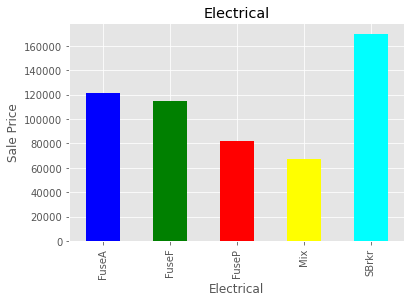

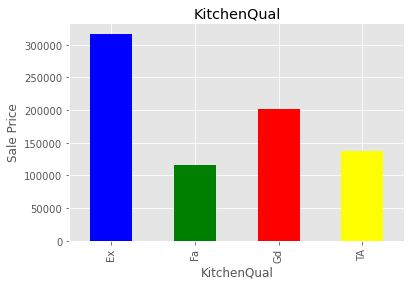

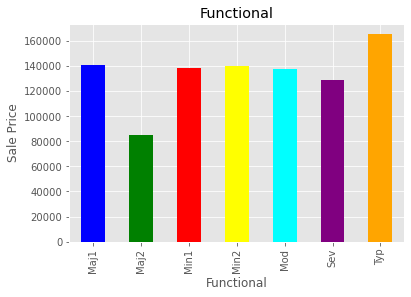

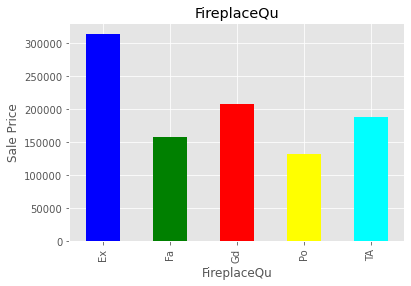

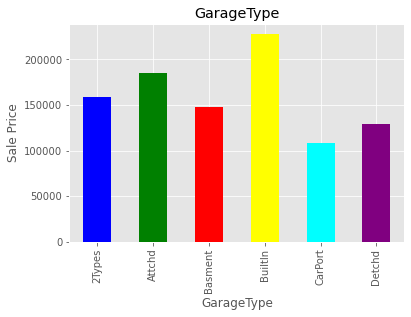

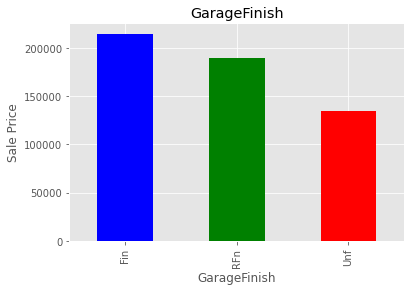

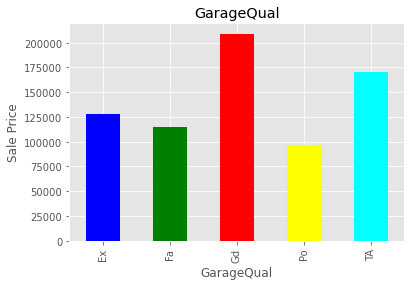

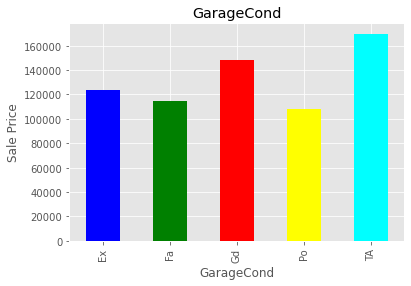

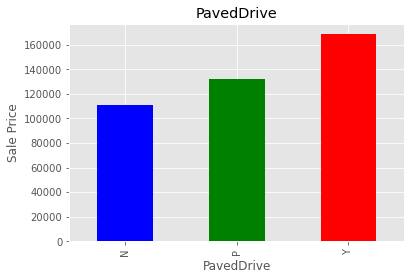

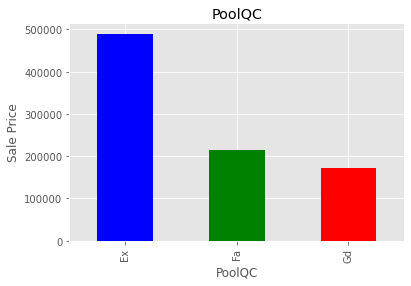

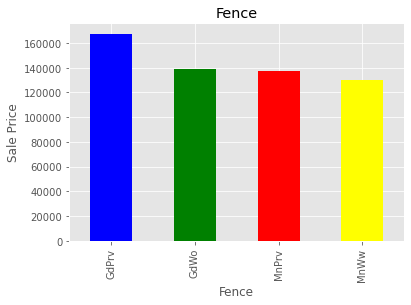

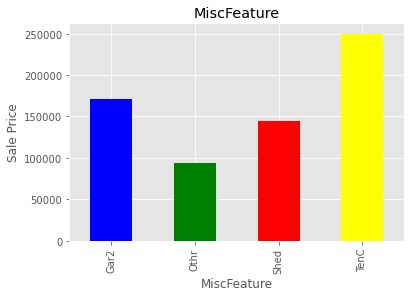

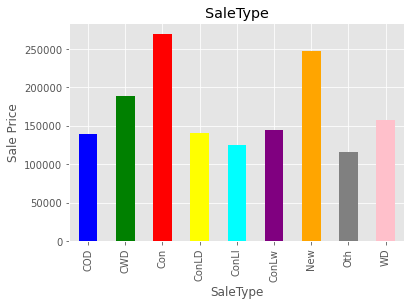

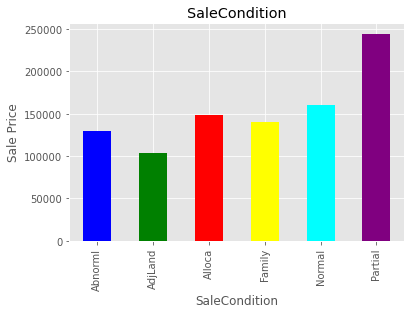

In [159]:
analyse_discrete(data, cat_vars)

It's clear categorical variables influence the house price.